Лабораторна робота №4

Баш Анастасія 
МІТ-31

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Завдання №1
Загальні операції з TensorFlow:

1. Створення тензорів:
Створити тензори різних розмірів та форм (скаляр, вектор, матриця) зі значеннями за замовчуванням або випадковими значеннями.
Використати константи, змінні, або інші функції для створення тензорів.

In [48]:
#Створення тензорів:

# Скаляр
scalar_tensor = tf.constant(5)
print("Scalar Tensor:", scalar_tensor.numpy())

# Вектор
vector_tensor = tf.constant([1, 2, 3])
print("Vector Tensor:", vector_tensor.numpy())

# Матриця
matrix_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Matrix Tensor:\n", matrix_tensor.numpy())

# Випадкові значення
random_matrix = tf.random.normal(shape=(2, 3), mean=0, stddev=1)
print("Random Matrix:\n", random_matrix.numpy())

# b. Операції з тензорами:

tensor_a = tf.constant([[1, 2], [3, 4]])
tensor_b = tf.constant([[5, 6], [7, 8]])

Scalar Tensor: 5
Vector Tensor: [1 2 3]
Matrix Tensor:
 [[1 2 3]
 [4 5 6]]
Random Matrix:
 [[ 0.14672601 -0.6204945   0.13436069]
 [-0.47250646  0.3295103  -0.00762352]]


2. Операції з тензорами:

Виконати операції додавання, віднімання, множення, та ділення між тензорами.

In [50]:
# Операції
addition_result = tf.add(tensor_a, tensor_b)
subtraction_result = tf.subtract(tensor_a, tensor_b)
multiplication_result = tf.multiply(tensor_a, tensor_b)
division_result = tf.divide(tensor_a, tensor_b)

print("Addition Result:\n", addition_result.numpy())
print("Subtraction Result:\n", subtraction_result.numpy())
print("Multiplication Result:\n", multiplication_result.numpy())
print("Division Result:\n", division_result.numpy())

Addition Result:
 [[ 6  8]
 [10 12]]
Subtraction Result:
 [[-4 -4]
 [-4 -4]]
Multiplication Result:
 [[ 5 12]
 [21 32]]
Division Result:
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]


Застосувати математичні функції (наприклад, синус, косинус) до тензорів.

In [51]:
tensor_с = tf.constant([[1.0, 2.0], [3.0, 4.0]])

# Застосування математичних функцій
sin_tensor = tf.math.sin(tensor_с)
cos_tensor = tf.math.cos(tensor_с)

print("Sin Tensor:\n", sin_tensor.numpy())
print("Cos Tensor:\n", cos_tensor.numpy())

Sin Tensor:
 [[ 0.84147096  0.9092974 ]
 [ 0.14112    -0.7568025 ]]
Cos Tensor:
 [[ 0.5403023 -0.4161468]
 [-0.9899925 -0.6536436]]


3.  Індексація та зрізи:

Звернутися до окремих елементів в тензорах та зрізати їх для отримання підмножини даних.

In [52]:
# c. Індексація та зрізи:

element = tensor_a[0, 1]
slice_tensor = tensor_a[:, 1]

print("Element at (0, 1):", element.numpy())
print("Slice Tensor:\n", slice_tensor.numpy())

Element at (0, 1): 2
Slice Tensor:
 [2 4]


4. Зміна форми тензорів:

Змінити розмір та форму тензорів (решейп) для підготовки їх до подальших операцій.

In [53]:
# d. Зміна форми тензорів:

reshaped_tensor = tf.reshape(tensor_a, shape=(1, 4))
print("Tensor:\n", tensor_a)
print("Reshaped Tensor:\n", reshaped_tensor.numpy())



Tensor:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Reshaped Tensor:
 [[1 2 3 4]]


Завдання №2
Глибше ознайомлення з TensorFlow:

1. Регресія:

Згенерувати синтетичний набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.

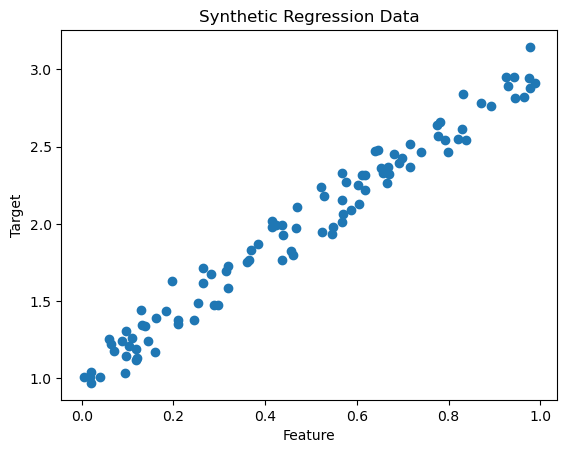

In [39]:

# Генерація синтетичних даних
np.random.seed(0)
X_reg = np.random.rand(100, 1)  # Ознака
y_reg = 2 * X_reg + 1 + 0.1 * np.random.randn(100, 1)  # Відповідна змінна

# Візуалізація синтетичного набору даних
plt.scatter(X_reg, y_reg)
plt.title('Synthetic Regression Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

Створити послідовну модель нейронної мережі з Dense шарами для регресії. Вибрати функцію втрати та оптимізатор для навчання моделі регресії.

In [40]:
# Створення послідовної моделі
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)  # Вихідний шар без активації для регресії
])

# Компіляція моделі
model_reg.compile(optimizer='adam', loss='mean_squared_error')

# Виведення структури моделі
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Навчити модель та оцінити її регресійну точність.

4/4 [==============================] - 0s 756us/step - loss: 1.7472
Regression Loss: 1.7472128868103027


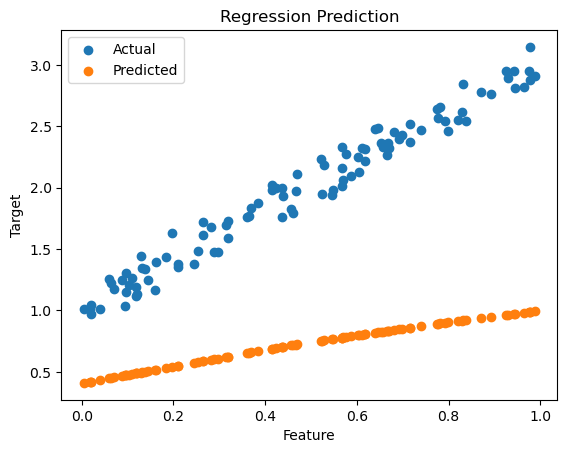

In [41]:
# Навчання моделі
model_reg.fit(X_reg, y_reg, epochs=50, verbose=0)

# Оцінка регресійної точності
regression_loss = model_reg.evaluate(X_reg, y_reg)
print(f'Regression Loss: {regression_loss}')

# Побудова графіка реальних та передбачених значень
y_pred = model_reg.predict(X_reg)
plt.scatter(X_reg, y_reg, label='Actual')
plt.scatter(X_reg, y_pred, label='Predicted', marker='o')
plt.legend()
plt.title('Regression Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

2. Класифікація:

Згенерувати синтетичний набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.

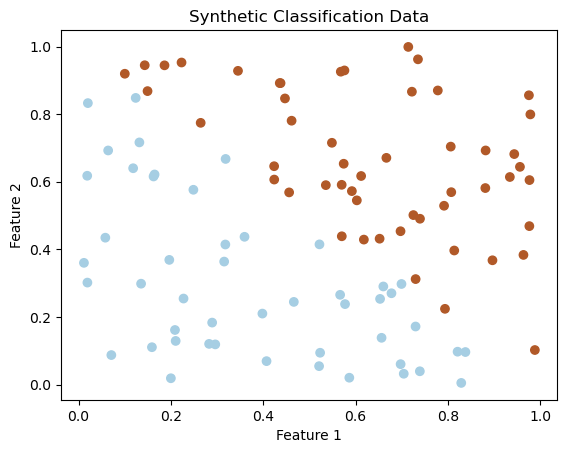

In [42]:
# Генерація синтетичних даних
np.random.seed(0)
X_clf = np.random.rand(100, 2)  # Ознаки
y_clf = (X_clf[:, 0] + X_clf[:, 1] > 1).astype(int)  # Бінарна мітка класу

# Візуалізація синтетичного набору даних
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap=plt.cm.Paired)
plt.title('Synthetic Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Створити послідовну модель нейронної мережі з Dense шарами для класифікації. Вибрати функцію втрати, оптимізатор та метрики для навчання моделі класифікації.

In [43]:
# Створення послідовної моделі
model_clf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Вихідний шар з сигмоїдальною активацією для класифікації
])

# Компіляція моделі
model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Виведення структури моделі
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Навчити модель та оцінити її класифікаційну точність.

4/4 [==============================] - 0s 674us/step - loss: 0.6848 - accuracy: 0.5200
Classification Loss: 0.6848201155662537
Classification Accuracy: 0.5199999809265137


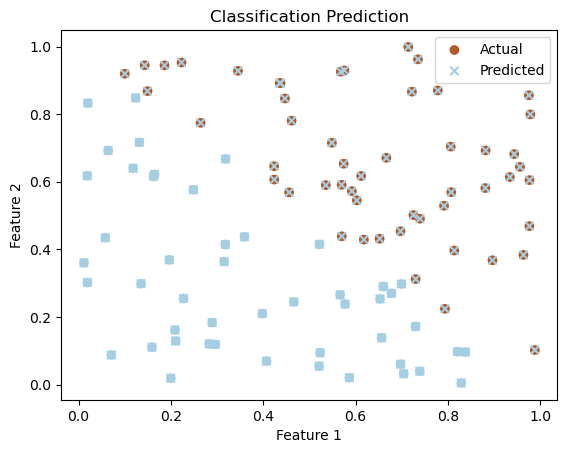

In [44]:
# Навчання моделі
model_clf.fit(X_clf, y_clf, epochs=50, verbose=0)

# Оцінка класифікаційної точності
classification_loss, classification_accuracy = model_clf.evaluate(X_clf, y_clf)
print(f'Classification Loss: {classification_loss}')
print(f'Classification Accuracy: {classification_accuracy}')

# Візуалізація реальних та передбачених класів
y_pred_proba = model_clf.predict(X_clf)
y_pred = (y_pred_proba > 0.5).astype(int)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap=plt.cm.Paired, label='Actual')
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_pred.flatten(), marker='x', cmap=plt.cm.Paired, label='Predicted')
plt.legend()
plt.title('Classification Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Завдання №3 Графічний аналіз наборів даних:

1. Візуалізація даних:

Використати бібліотеку Matplotlib для створення різних видів графіків, таких як scatter plot, гістограми, лінійні графіки, які відображають дані з набору даних. Показати взаємозв'язки між ознаками або класами на графіках.

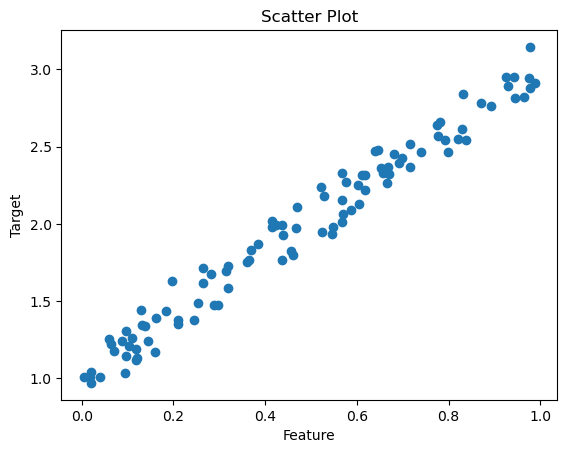

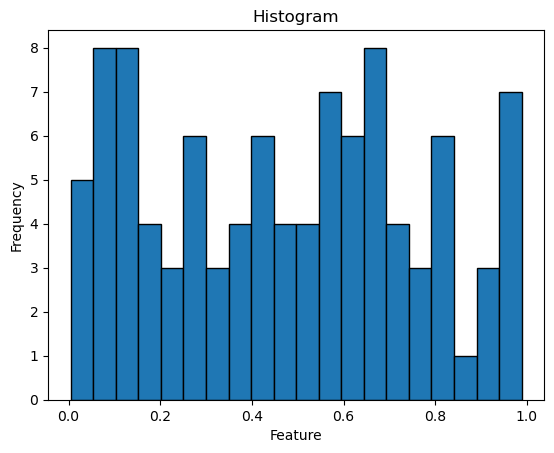

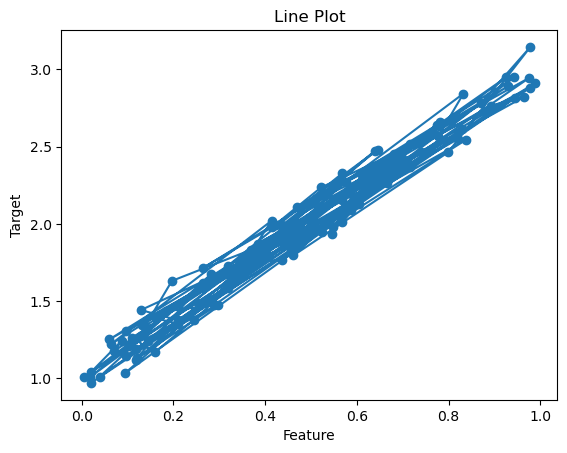

In [45]:
# Візуалізація scatter plot
plt.scatter(X_reg, y_reg)
plt.title('Scatter Plot')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

# Візуалізація гістограми
plt.hist(X_reg, bins=20, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.show()

# Візуалізація лінійного графіку
plt.plot(X_reg, y_reg, marker='o')
plt.title('Line Plot')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

2. Візуалізація результів:

Побудувати графіки, що відображають реальні та передбачені значення для задачі регресії або матриці плутанини для задачі класифікації.
Додати підписи, легенду та інші елементи для покращення зрозуміння графіків.

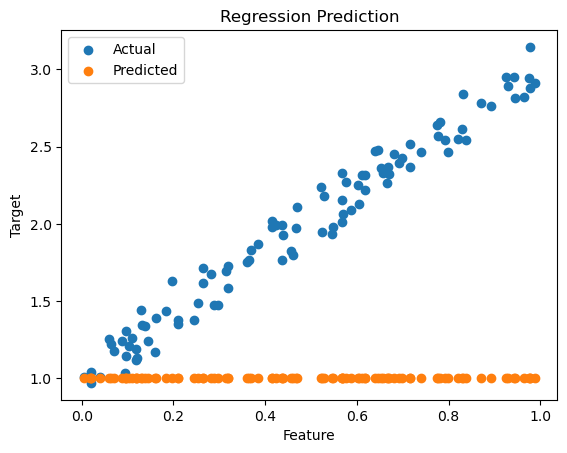

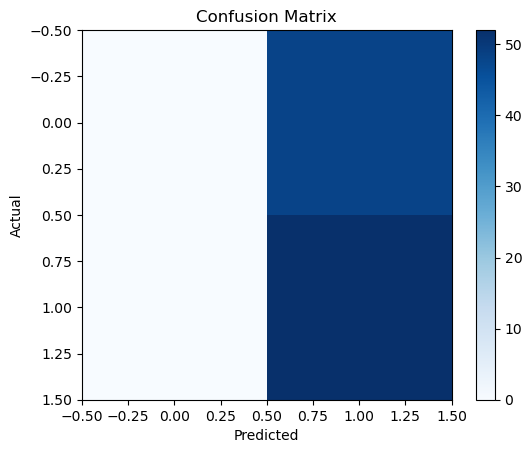

In [47]:
# Графік реальних та передбачених значень для регресії
plt.scatter(X_reg, y_reg, label='Actual')
plt.scatter(X_reg, y_pred, label='Predicted', marker='o')
plt.legend()
plt.title('Regression Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

# Матриця плутанини для класифікації
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_clf, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()